# Course: ISE 468 ISE 468 Introduction to Machine Learning and Data Analytics, Term: 211

# Group name: Khaterah (خاطرة)

# Group members:

### 1- Mohammed Al-Mufadhi	    201736470

### 2- Alkhater Abdulaziz		201575230

### 3- Majed Al-Rasheed		    201591450

### 4- Mustafa Al Yagoub		201678640

### 5- Mohammed Jaafar		    201725310




# Team member contribution:

## Mohammed Al-Mufadhi	201736470

### Contribution:

Change Model Predictive Algorithm to SVM (Kernel trick Linear) 

## Alkhater Abdulaziz	201575230	

### Contribution:

(Bringing dataset, Problem Statement,  Data Information and Descriptive Statistics, Scale Training and Test dataset, Work on Report) 

## Majed Al-Rasheed	201591450 

### Contribution:

Train & Split, Analysis of Output Column, Build Predictive model)

## Mustafa Al Yagoub	201678640	

### Contribution:


(Models prediction on training data set, Model prediction on test data set, Work on Report)

## Mohammed Jaafar	201725310	

### Contribution: 
(Model Performance (on all algorithms) , update the model (changing hyperparameters) , Work on Report ) 


# Project: Predictive Modeling (Classifier)

# Problem:
This is a workflow for building a predictive classification model. With comments that are to illustrate what we have understood from each step.

# Step 1. a. Define Business Problem and Machine Learning Problem
The data that we have is for predicting if the person is prone to hard disease or not so that he could seek health treatment. We have 11 attributes(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope) that have multipule criteria, that we will use to predict the pacients health status. And this problem can be solved through classification through some predictive models.

In [1]:
conda install -c plotly plotly

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import cross_val_score
# models 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import svm


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV




import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



import plotly.express as px
import pandas as pd

#  b. Data Information and Descriptive Statistics 

In [3]:
df = pd.read_csv('heart.csv')
               

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.head(10000)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Step 2. Scale Training and Test dataset 

In [7]:
#The data frame before has categorical data, therefore converting categorical to binary is required
#Using Dummy()
df = pd.get_dummies(df)
df.head(10000)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


# Step 2. Train Test Split 

In [8]:
#Splitting the Disease diagnosis from the dataset

X = df.drop("HeartDisease",axis=1)
#X

y = df['HeartDisease']

In [9]:
#Distributing -- (Training = 70%) - (Test = 30%)

df_train, df_test = train_test_split(df, random_state=2023,test_size=.3,stratify =df["HeartDisease"])

In [13]:

#Kfold cross validation
kfold = KFold(n_splits=3,random_state=2023,shuffle=True)


In [14]:

kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=2023)
#data['target'] IS THE VARIABLE USED FOR STRATIFIED SAMPLING.
splits = kfold.split(df,df['HeartDisease'])
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{df["HeartDisease"].value_counts() / len(df)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{df.iloc[test_index,3].value_counts() / len(df.iloc[test_index,3])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{df.iloc[train_index,3].value_counts() / len(df.iloc[train_index,3])}\n\n')

PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.67	TEST SET SIZE: 0.33
PROPORTION OF TARGET IN THE TRAINING SET
0    0.781046
1    0.218954
Name: FastingBS, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
0    0.759804
1    0.240196
Name: FastingBS, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.67	TEST SET SIZE: 0.33
PROPORTION OF TARGET IN THE TRAINING SET
0    0.74183
1    0.25817
Name: FastingBS, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
0    0.779412
1    0.220588
Name: FastingBS, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.67	TEST SET SIZE: 0.33
PROPORTION OF TARGET IN THE TRAINING SET
0    0.777778
1    0.222222
Name: FastingBS, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
0    0.761438
1    0.238562
Name: FastingBS, dtype: float64




In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023,test_size=.3,stratify =df["HeartDisease"])

# Step 3. Analysis of the Target (Output) Column 

In [16]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:>

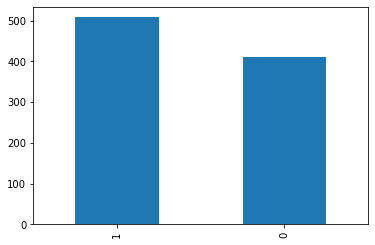

In [17]:
y.value_counts().plot(kind='bar')

# Comment 
From looking at the graph we can see that the data we have is balanced so we can assume that the training and the testing split will have good representation of the full data.

In [18]:
print("Count of Train Labels :\n" ,y_train.value_counts())

Count of Train Labels :
 1    355
0    287
Name: HeartDisease, dtype: int64


In [19]:
print("Count of Test Labels :\n" ,y_test.value_counts())

Count of Test Labels :
 1    153
0    123
Name: HeartDisease, dtype: int64


# Step 5. Build Predictive Model 

In [20]:
# model object
clf = MLPClassifier(random_state=1, max_iter=300,hidden_layer_sizes=(6,6,2))

In [21]:
#Training 
clf.fit(X_train, y_train)

C:\Users\moh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 6, 2), max_iter=300, random_state=1)

# Step 6. Model Predictions on Training Dataset

Confusion Matrix for Train Dataset


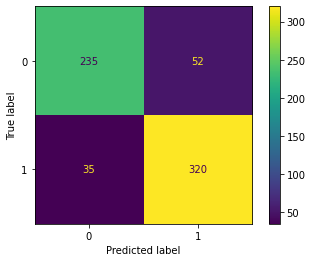

In [22]:
y_train_predict = clf.predict(X_train)
plot_confusion_matrix(clf, X_train, y_train)  
print("Confusion Matrix for Train Dataset")

# Step 7. Model Predictions on Test Dataset


Confusion Matrix for Test Dataset


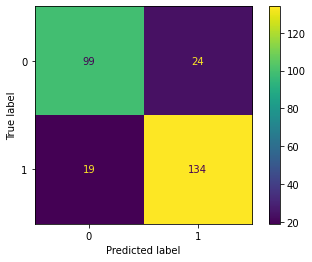

In [23]:
y_test_predict = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test) 
print("Confusion Matrix for Test Dataset")

# Step 8. Model Performance 

In [127]:



train_score_1 = accuracy_score(y_train,y_train_predict)
train_score_2 = precision_score(y_train, y_train_predict, average='macro')
train_score_3 = recall_score(y_train, y_train_predict, average='macro')
train_score_4 = f1_score(y_train, y_train_predict)
train_score_5 = roc_auc_score(y_train, y_train_predict)

test_score_1 = accuracy_score(y_test,y_test_predict)
test_score_2 = precision_score(y_test, y_test_predict, average='macro')
test_score_3 = recall_score(y_test, y_test_predict, average='macro')
test_score_4 = f1_score(y_test, y_test_predict)
test_score_5 = roc_auc_score(y_test, y_test_predict)

print('Model Accuracy on Train : ', train_score_1)
print('Model Accuracy on Test : ', test_score_1,' \n')

print('Model Precision on Train : ', train_score_2)
print('Model Precision on Test :', test_score_2, ' \n')


print('Model Recall on Train :', train_score_3)
print('Model Recall on Test :', test_score_3 ,'\n')

print('Model F1 Score on Train ', train_score_4)
print('Model F1 Score on Test ', test_score_4 , '\n')

print('Model Roc Auc on Train', train_score_5)
print('Model Roc Auc on Test', test_score_5)

Model Accuracy on Train :  0.8644859813084113
Model Accuracy on Test :  0.8442028985507246  

Model Precision on Train :  0.8652927120669056
Model Precision on Test : 0.8435421583351213  

Model Recall on Train : 0.8601118908573392
Model Recall on Test : 0.8403475211222701 

Model F1 Score on Train  0.8803301237964236
Model F1 Score on Test  0.8617363344051446 

Model Roc Auc on Train 0.8601118908573391
Model Roc Auc on Test 0.8403475211222702


# Comment

From the Evaluation of this model, we find that all measures from accuracy, precision, recall, F1 Score and Roc_Auc, which means it is an excellent model to be used in business context. From the accuracy and the confusion matrix we can see that the model is applicable due to its good accuracy, and we are safe of overfitting due to the test and train values being close.

clf = MLPClassifier(random_state=1, max_iter=300,hidden_layer_sizes=(6,6,2))

# Step 9. Update the Model

# Comment 
After changing the hyperparameters of the multi layer perceptron classifier we can see that when changing the perceptron neural network to (6,6,4) instead of (6,6,2) we can see that the accuracy values of both the train and test sets start to have a larger difference and this is what we expect the more complex the model is, the more likely it is to overfit.



Confusion Matrix for Train Dataset
Confusion Matrix for Test Dataset
Model Accuracy on Train :  0.8894080996884736
Model Accuracy on Test :  0.8442028985507246  

Model Precision on Train :  0.8908602150537634
Model Precision on Test : 0.842948717948718  

Model Recall on Train : 0.8853167787211071
Model Recall on Test : 0.8411445879164674 

Model F1 Score on Train  0.9023383768913343
Model F1 Score on Test  0.8608414239482199 

Model Roc Auc on Train 0.8853167787211071
Model Roc Auc on Test 0.8411445879164674


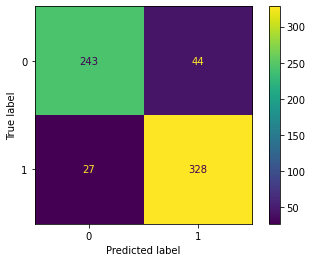

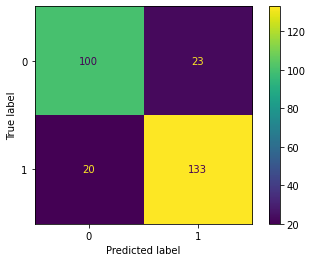

In [145]:
clf = MLPClassifier(random_state=1, max_iter=10000,hidden_layer_sizes=(6,6,4))
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
plot_confusion_matrix(clf, X_train, y_train)  
print("Confusion Matrix for Train Dataset")
y_test_predict = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test) 
print("Confusion Matrix for Test Dataset")

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


train_score_upd_1 = accuracy_score(y_train,y_train_predict)
train_score_upd_2 = precision_score(y_train, y_train_predict, average='macro')
train_score_upd_3 = recall_score(y_train, y_train_predict, average='macro')
train_score_upd_4 = f1_score(y_train, y_train_predict)
train_score_upd_5 = roc_auc_score(y_train, y_train_predict)

test_score_upd_1 = accuracy_score(y_test,y_test_predict)
test_score_upd_2 = precision_score(y_test, y_test_predict, average='macro')
test_score_upd_3 = recall_score(y_test, y_test_predict, average='macro')
test_score_upd_4 = f1_score(y_test, y_test_predict)
test_score_upd_5 = roc_auc_score(y_test, y_test_predict)

print('Model Accuracy on Train : ', train_score_upd_1)
print('Model Accuracy on Test : ', test_score_upd_1,' \n')

print('Model Precision on Train : ', train_score_upd_2)
print('Model Precision on Test :', test_score_upd_2, ' \n')


print('Model Recall on Train :', train_score_upd_3)
print('Model Recall on Test :', test_score_upd_3 ,'\n')

print('Model F1 Score on Train ', train_score_upd_4)
print('Model F1 Score on Test ', test_score_upd_4 , '\n')

print('Model Roc Auc on Train', train_score_upd_5)
print('Model Roc Auc on Test', test_score_upd_5)

# Step10. Change the Model Algorithm


In [183]:
from sklearn import svm
kernl = svm.SVC(kernel='linear', C=1, random_state=2023)
kernl.fit(X_train,y_train)
scores = cross_val_score(kernl, X, y, cv=10)
scores

array([0.82608696, 0.91304348, 0.84782609, 0.95652174, 0.88043478,
       0.82608696, 0.86956522, 0.82608696, 0.75824176, 0.76923077])

# Step 11. Model Predictions on Training Dataset

Confusion Matrix for Test Dataset


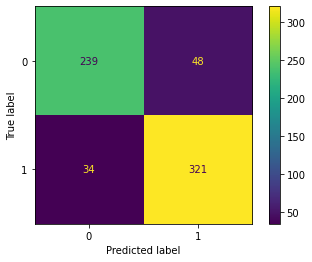

In [184]:
y_train_predict = kernl.predict(X_train)
plot_confusion_matrix(kernl, X_train, y_train) 
print("Confusion Matrix for Test Dataset")

# Step 12. Model Predictions on Test Dataset

Confusion Matrix for Test Dataset


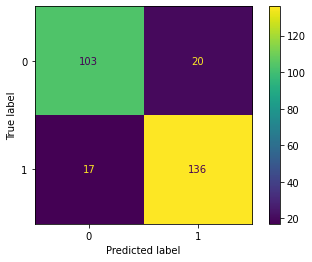

In [179]:
y_test_predict = kernl.predict(X_test)
plot_confusion_matrix(kernl, X_test, y_test) 
print("Confusion Matrix for Test Dataset")

# Step 13. Model Performance

Confusion Matrix for Train Dataset
Confusion Matrix for Test Dataset
Model Accuracy on Train :  0.8722741433021807
Model Accuracy on Test :  0.8659420289855072  

Model Precision on Train :  0.8726882873224336
Model Precision on Test : 0.8650641025641026  

Model Recall on Train : 0.8684889826765472
Model Recall on Test : 0.8631436314363143 

Model F1 Score on Train  0.8867403314917127
Model F1 Score on Test  0.8802588996763754 

Model Roc Auc on Train 0.8684889826765473
Model Roc Auc on Test 0.8631436314363143


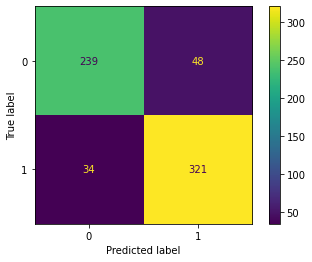

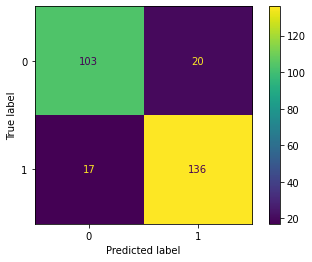

In [180]:

y_train_predict = kernl.predict(X_train)
plot_confusion_matrix(kernl, X_train, y_train)  
print("Confusion Matrix for Train Dataset")
y_test_predict = kernl.predict(X_test)
plot_confusion_matrix(kernl, X_test, y_test) 
print("Confusion Matrix for Test Dataset")

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


train_score_new_1 = accuracy_score(y_train,y_train_predict)
train_score_new_2 = precision_score(y_train, y_train_predict, average='macro')
train_score_new_3 = recall_score(y_train, y_train_predict, average='macro')
train_score_new_4 = f1_score(y_train, y_train_predict)
train_score_new_5 = roc_auc_score(y_train, y_train_predict)

test_score_new_1 = accuracy_score(y_test,y_test_predict)
test_score_new_2 = precision_score(y_test, y_test_predict, average='macro')
test_score_new_3 = recall_score(y_test, y_test_predict, average='macro')
test_score_new_4 = f1_score(y_test, y_test_predict)
test_score_new_5 = roc_auc_score(y_test, y_test_predict)

print('Model Accuracy on Train : ', train_score_new_1)
print('Model Accuracy on Test : ', test_score_new_1,' \n')

print('Model Precision on Train : ', train_score_new_2)
print('Model Precision on Test :', test_score_new_2, ' \n')


print('Model Recall on Train :', train_score_new_3)
print('Model Recall on Test :', test_score_new_3 ,'\n')

print('Model F1 Score on Train ', train_score_new_4)
print('Model F1 Score on Test ', test_score_new_4 , '\n')

print('Model Roc Auc on Train', train_score_new_5)
print('Model Roc Auc on Test', test_score_new_5)

#  Comment 
After looking at both the confusion matrix and the accuracy score we can conclude that the Multi Layer Classification with 6x6x4 neurons is the best model, and better than Support Vector Machine as with lower computation power, and obtaining an overall accuracy of 84%, which is considered to be excellent. 

# reference


https://scikit-learn.org/stable/modules/svm.html 

https://data-flair.training/blogs/svm-kernel-functions/

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report